<a href="https://colab.research.google.com/github/Huynhngocthanh/cac-thuat-toan-toi-uu/blob/main/%C4%90%E1%BB%93_%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chúng ta có 1 bảng dữ liệu về chiều cao và cân nặng của 15 người như trong bảng dưới đây:

*  Chiều cao (cm)	147	150	153	155	158	160	163	165 168	170	173	175	178	180	183
*  Cân nặng (kg)	49	50	51	52	54	56	58	59 60	62	63	64	66	67	68

Bài toán : Dự đoán cân nặng của một người dựa vào chiều cao của họ.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

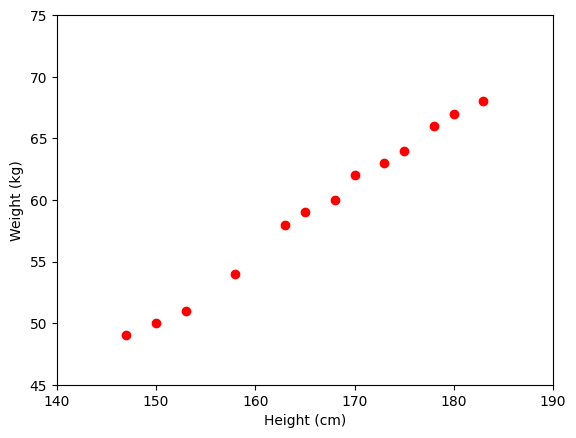

In [4]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt:

(cân nặng) = w_1*(chiều cao) + w_0)

w =  [[22.21867545]
 [ 0.23775985]]


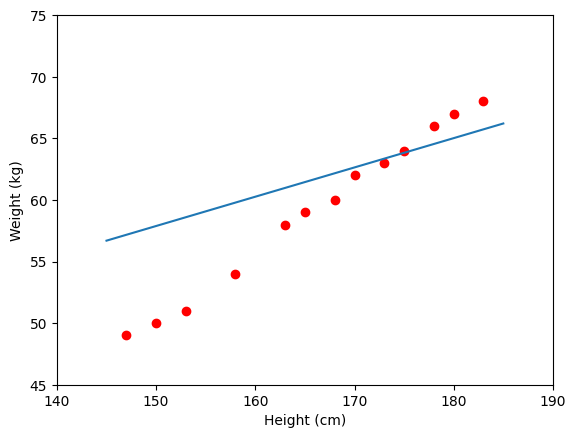

In [33]:
# Xây dựng Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Tính trọng lượng của dây nối 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Chuẩn bị dây chuyền lắp ráp 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Vẽ đường lắp 
plt.plot(X.T, y.T, 'ro')
plt.plot(x0, y0)       
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. Vậy mô hình Linear Regression hoạt động tốt với tập dữ liệu training. Bây giờ, chúng ta sử dụng mô hình này để dự đoán cân nặng của hai người có chiều cao 155 và 160 cm mà chúng ta đã không dùng khi tính toán nghiệm.

In [29]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0

print(u'Dự đoán cân nặng của người có chiều cao 155 cm: %.2f (kg), số liệu thật: 52 (kg)'  %(y1)) 
print(u'Dự đoán cân nặng của người có chiều cao 160 cm: %.2f (kg), số liệu thật: 56 (kg)'  %(y2))

Dự đoán cân nặng của người có chiều cao 155 cm: 59.07 (kg), số liệu thật: 52 (kg)
Dự đoán cân nặng của người có chiều cao 160 cm: 60.26 (kg), số liệu thật: 56 (kg)


In [12]:
# sử dụng thư viện Scikit-learn để tìm nghiệm
from sklearn import datasets, linear_model

# điều chỉnh mô hình bằng hồi quy tuyến tính
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# So sánh hai kết quả
print(u'Nghiệm tìm được bằng scikit-learn  : ', regr.coef_ )
print(u'Nghiệm tìm được từ phương trình (5): ', w.T)

Nghiệm tìm được bằng scikit-learn  :  [[-33.73541021   0.55920496]]
Nghiệm tìm được từ phương trình (5):  [[-33.73541021   0.55920496]]


 Ta thấy rằng hai kết quả thu được như nhau

w =  [[22.21867545]
 [ 0.23775985]]


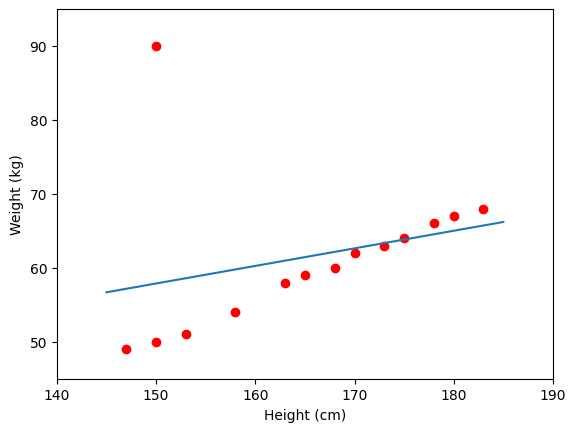

In [14]:
# Trong trường hợp có nhiễu, với một cặp dữ liệu (150 cm, 70kg), kết quả đã sai lệch đi rất nhiều.
import numpy as np 
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90]]).T

# Building Xbar 
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

# Calculating weights of the fitting line 
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
# Preparing the fitting line 
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Drawing the fitting line 
plt.plot(X, y, 'ro')     # data 
plt.plot(x0, y0)               # the fitting line
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()